# Recursion examples

adopted from: https://github.com/rasbt/algorithms_in_ipython_notebooks

https://github.com/AbhishekSinhaCoder/Data-Structures-Concepts-through-Notebook

# Examples using Recursion

**Important Note**

For most cases, using function recursion should be avoided in Python are better be implemented using for/while loops most of the time (although, I must admit that recursive solutions do look elegant). One of the reasons is that stacking recursive calls can easily blow up memory or at least result in the popular yet nasty "RuntimeError: maximum recursion depth exceeded". Also, keep in mind that Python does not optimize tail recursion in favor of having the full tracebacks for debugging; related to that, please see Guido van Rossums blog posts "[Tail Recursion Elimination](http://neopythonic.blogspot.com.au/2009/04/tail-recursion-elimination.html)" and "[Final Words on Tail Calls](http://neopythonic.blogspot.com.au/2009/04/final-words-on-tail-calls.html)." If you do like to play around with recursion more efficiently, I highly recommend taking a look at [Haskell](https://www.haskell.org) or other functional programming languages. That being said, below are some examples of recursive function implementations in Python for illustrative purposes.

## Review: Running time and big-$\mathcal{O}$: Recursive Algorithms for Computing Powers

As example of the use of linear recursion, we consider the problem of raising a number $x$ to an arbitrary nonnegative integer, $n$. That is, we wish to compute the power function, defined as $power(x,n) = xn$. (We use the name “power” for this discussion, to differentiate from the built-in Python function _pow_ that provides such functionality.) We will consider two different recursive formulations for the problem that lead to algorithms with very different performance.
A trivial recursive definition follows from the fact that $x^n = x \cdot x^{n−1}$ for $n > 0$.


\begin{equation}
power(x,n) ==\left\{
                \begin{array}{ll}
                        1 \ if \ n = 0\\
                        x \ power(x, n − 1) \ otherwise.
                \end{array}
              \right.
\end{equation}

This definition leads to a recursive algorithm shown below:

In [ ]:
# in case we did not know about Pythons x**n statement :)

In [1]:
2**8

256

In [2]:
554524352**0 # our base case

1

In [ ]:
# so the idea is to reduce the problem to a simpler instance of the same problem
## to start with we need a base case
## so base case for power would be x to 0 which is 1

In [3]:
2**0

1

## Basic (naive) power function - recursive

In [1]:
def basicpower(x, n):
    '''Compute the value x**n for integer n.''' 
    if n == 0:
        return 1 # base case without base case our recursive function will run forever
    else:
        return x  * basicpower(x, n-1) # our recursive call so we are calling the function on itself on a smaller problem space

In [5]:
basicpower(2, 8)

256

# How to make a recursive function in two easy steps
* figure out the base case
* figure out how to reduce problem to a subset of the same problem

In [6]:
basicpower(2,8)

256

A recursive call to this version of power(x,n) runs in $\mathcal{O}(n)$ time.

In [2]:
2**1000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

In [8]:
print(f"Number of digits is {len(str(2**1000))}")

Number of digits is 302


In [ ]:
basicpower(2,2200)

: 

In [2]:
for n in range(2000,3000, 10):
    print(f"Working on {n} and the number of digits is {len(str(basicpower(2,n)))}")

: 

In [10]:
%%timeit
basicpower(2,1000)

255 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%%timeit
2**1000

945 ns ± 46.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
%%timeit
basicpower(2,100)

16.7 µs ± 971 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%%timeit
2**100

314 ns ± 38.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [4]:
import sys
print(sys.getrecursionlimit())

3000


In [10]:
basicpower(2,950)

9516908214257811601907599988159363584840065290620124537956939899622020205826587990689077212775400643774711832257235027522909345571487396529861315719055325605011013378863743193233193022939505515969530853007049198118833591724018432564205433218231411731277088674906521042072098232413978624

In [15]:
sys.setrecursionlimit(6000)

In [17]:
%%timeit
basicpower(2,1000)

247 µs ± 8.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
%%timeit
basicpower(2,2000)

795 µs ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%%timeit
basicpower(2,4000)

: 

In [ ]:
# not satisfied with performance of our basic power we have an improvement in mind

## Improved Power Function

In [2]:

def power(x, n):
    '''Compute the value x**n for integer n.''' 
    if n == 0: # this is our base case
        return 1 
    else:
        partial = power(x, n // 2) # remember that x^4*x^4 == x^8 or (x^4)^2 == x^(4*2) == x^8
        result = partial * partial
    if n % 2 == 1:  # for odd powers we need to multiply by the number
        result *= x # so x^9 = x^4 * x^4 * x
    return result

In [5]:
2**(-2)

0.25

In [3]:
power(2,8)

256

In [4]:
power(2,9)

512

In [6]:
power(2,10_000)

1995063116880758384883742162683585083823496831886192454852008949852943883022194663191996168403619459789933112942320912427155649134941378111759378593209632395785573004679379452676524655126605989552055008691819331154250860846061810468550907486608962488809048989483800925394163325785062156830947390255691238806522509664387444104675987162698545322286853816169431577562964076283688076073222853509164147618395638145896946389941084096053626782106462142733339403652556564953060314268023496940033593431665145929777327966577560617258203140799419817960737824568376228003730288548725190083446458145465055792960141483392161573458813925709537976911927780082695773567444412306201875783632550272832378927071037380286639303142813324140162419567169057406141965434232463880124885614730520743199225961179625013099286024170834080760593232016126849228849625584131284406153673895148711425631511108974551420331382020293164095759646475601040584584156607204496286701651506192063100418642227590867090057460641785695191145605506

In [7]:
import math


In [8]:
math.log2(1024)

10.0

In [9]:
# so for 10_000 we need 14 recursive calls
math.log2(10_000)

13.287712379549449

In [10]:
math.log2(1024*1024) # for Million we need 20 recursive calls

20.0

In [11]:
math.log2(10**100) # log n of googool that is 10 with 100 zeros more than atoms in the universe

332.19280948873626

## Googool - sidenote on history

Invention of the term "googol" is attributed to the nine-year-old nephew of mathematician Edward Kasner. The term was introduced in his 1940 book "Mathematics and the Imagination" and is used to describe a very large number. The term "googolplex" was coined to describe an even larger number, namely $10^{googol}$, or equivalently, $10^{10^{100}}$. The number of atoms in the observable universe is estimated to be around $10^{80}$.

The term was coined in 1920 by 9-year-old Milton Sirotta (1911–1981), nephew of U.S. mathematician Edward Kasner.
Src: https://en.wikipedia.org/wiki/Googol

In [ ]:
# so if we were playing the guess the number with yes and no questions we could figure out any number up to googool in 333 questions

# not bad when we consider that number of atoms in Universe is something 10**80

In [12]:
%%timeit
power(2,1000)

3.04 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%%timeit
2**1000

1.06 µs ± 52.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
%%timeit
basicpower(2,1000)

280 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
%%timeit
power(2,2000)

4.25 µs ± 77.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%%timeit
power(2,4000)

7.98 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [17]:
%%timeit
power(2,2_000_000)

7.98 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
# catch is that we are starting to deal with huuuge numbers
print(f"Number of digits is {len(str(power(2,2_000_000)))}")

ValueError: Exceeds the limit (4300) for integer string conversion

In [28]:
%%timeit
2**1000

The slowest run took 4.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 831 ns per loop


In [29]:
%%timeit
2**2000

1000000 loops, best of 5: 1.8 µs per loop


In [30]:
%%timeit
2**2_000_000

100 loops, best of 5: 8.71 ms per loop


In [31]:
math.pow(2,8)

256.0

In [32]:
%%timeit
math.pow(2,1_000)

The slowest run took 39.51 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 240 ns per loop


In [33]:
math.pow(2,1_000)

1.0715086071862673e+301

In [34]:
2**1_000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

In [41]:
%%timeit
math.pow(2,1_010)

The slowest run took 30.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 241 ns per loop


To analyze the running time of the revised algorithm, we observe that the exponent in each recursive call of function power(x,n) is at most half of the preceding exponent. As we saw with the analysis of binary search, the number of times that we can divide $n$ in half before getting to one or less is $\mathcal{O}(log n)$. Therefore, our new formulation of the power function results in $\mathcal{O}(logn)$ recursive calls. Each individual activation of the function uses $\mathcal{O}(1)$ operations (excluding the recursive calls), and so the total number of operations for computing power(x,n) is O(logn). This is a significant improvement over the original $\mathcal{O}(n)$-time algorithm.

**Exercise:** Test the two functions with a timer and see the difference. Identify the base case and stopping conditions.

In [ ]:
# so we got the famous stack overflow
# technically we could adjust the recursion depth in Python but it would not really help in the long run

In [ ]:
%%timeit
power(2,100_000)

In [ ]:
%%timeit
2**100_000

In [ ]:
%%timeit
power(2,1_000_000)

In [ ]:
%%timeit
2**1_000_000

# We humans operate better on visual data - 1 picture and 1000 words

In [68]:
# in python we can pass functions as arguments
import matplotlib.pyplot as plt
import time
from IPython.utils import io as iuio
def automatic_time(input_array, func_name):
    # input_array contains all elements of input,
    #   preferably sorted from small to big,
    #   each element could also be a tuple, which is requried
    #   for functions that need more than 1 input
    # func_name is the name of the function (as object, not str)
    # this function also suppresses printing output from the {func_name}
    ret = []
    for val in input_array:
#         print(time.process_time_ns())
#         start = time.process_time()
        start = time.time()

        with iuio.capture_output() as suppressed:
            if isinstance(val, tuple):
                _ = func_name(*val) #unrolling the tuple to pass multiple arguments to our function
            else:
                _ = func_name(val) # just a single argument function
                
        ret.append((time.time() - start)) # 10e9 converts unit from second to nanosecond
    return ret

my_input_arr = [(2,1_000),(2,2_000)] # so our inputs are tuples of (base, power)
print("testing function_1 with the automatic measure")
print(f"run-time for function 1 result in nanoseconds: \n{automatic_time(my_input_arr, basicpower)}")

testing function_1 with the automatic measure
run-time for function 1 result in nanoseconds: 
[0.000997304916381836, 0.0019991397857666016]


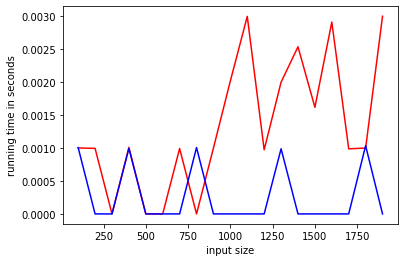

In [8]:
input_arr = [(2,i) for i in range(100, 2_000, 100)] # we will use list comprehension to generate our input

# input_arr_t = [(i,i) for i in range(1, 1000)]

# fun1 = automatic_time(input_arr, function_1)
results = automatic_time(input_arr, basicpower) # this is our naive function
results_2 = automatic_time(input_arr, power) # this is our improved function
# fun3 = automatic_time(input_arr, function_3)
# fun4 = automatic_time(input_arr_t, function_4)
# fun5 = automatic_time(input_arr_t, function_5)

plt.plot([el[1] for el in input_arr], results, color="red") # we only want to see the i as x
plt.plot([el[1] for el in input_arr], results_2, color="blue") # we only want to see the i as x
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

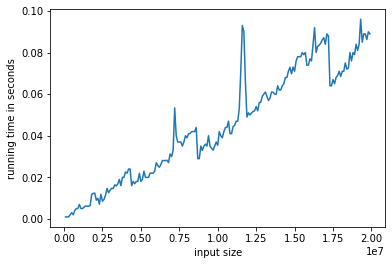

In [9]:
input_arr = [(2,i) for i in range(100_000, 20_000_000, 100_000)]

results = automatic_time(input_arr, power)
# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

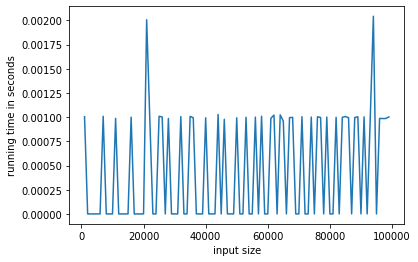

In [20]:
input_arr = [(2,i) for i in range(1_000, 100_000, 1_000)]

results = automatic_time(input_arr, power)
# mathpow_results = automatic_time(input_arr, math.pow) # math.pow does n ot like large powers

plt.plot([el[1] for el in input_arr], results)
# plt.plot([el[1] for el in input_arr], mathpow_results)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
math.pow(2,800_000)

# so it certainly looks linear but the jumps in our speed indicates how OS and computer hardware might affect an algorithm in real life

## Factorial

In [47]:
# so again base case for stopping will be 1

In [21]:
def factorial(x):
    if x <= 1:
        return 1 # not x! as factorial of 0 is considered 1! # TODO find out why factorial of 0 is 1
    else:
        return x * factorial(x-1) # so we want to be sure that our problem space keeps getting smaller

In [23]:
import math
math.factorial(0)

1

In [25]:
math.factorial(5),math.factorial(6),math.factorial(7)

(120, 720, 5040)

In [27]:
# regular loop based algorithm should need less memory
def factorial_loop(x):
    res = 1  # try not to put 0 as a multiplier...
    while x > 1:
        res *= x
        x -= 1
    return res

In [28]:
factorial_loop(5)

120

In [29]:
factorial(5)

120

In [53]:
factorial(1)

1

5! = 5 x 4 x 3 x 2 x 1 = 120

In [54]:
factorial(5)

120

In [30]:
%%timeit
factorial(10)

1.24 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [31]:
%%timeit
factorial(100)

18.8 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [32]:
%%timeit
factorial_loop(100)

11.6 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [33]:
%%timeit
factorial(1000)

641 µs ± 84.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [34]:
%%timeit
factorial(2000)

1.92 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit
factorial_loop(1000)

451 µs ± 74.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [36]:
%%timeit
factorial_loop(2000)

1.33 ms ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [69]:
factorial(5000)

4228577926605543522201064200233584405390786674626646748849782402181358052708108200690899047871706387537084746657300685445878486066683812736337210893772787631279390363058462160643904478986982239871929708896211612652968321775500399242196837031469072644728787897904047548841622152266719284109692369104495659717363529484002238403811206448202308576711045023061748947554283097617817240408053248099278093287840554861993645482912118762582488021891739779000502132125980436392446264607705113588465951086754705858339246552255890354744359883473831789880346330084586315102090915099356538200109330479657425567419309170551728052002360750859911976352287559079020433697431235069168312119244959715562674075214621989862330886259983028598648575787494459631152869708867100462684236481789899054546908613916132183441741488071862344481148312094903611965468727677556178868287202691048140924564103418359756042764581615131785759016610717825441569808833593727299956033713712004710494376562911424886053352994996423006999722049181

In [70]:
len(str(factorial(5000)))

16326

In [37]:
%%timeit
math.factorial(1_000)

51.4 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [72]:
%%timeit
math.factorial(2_000)

10000 loops, best of 5: 136 µs per loop


In [ ]:
%%timeit
factorial(5000) #

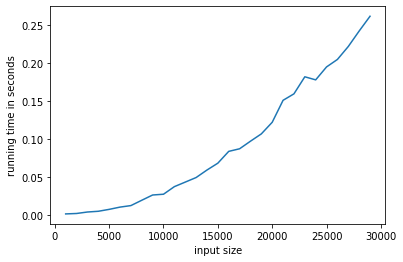

In [38]:
input_arr = [i for i in range(1_000, 30_000, 1_000)]

fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

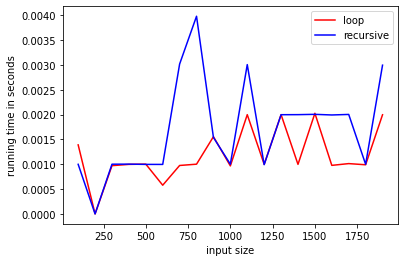

In [39]:
input_arr = [i for i in range(100, 2_000, 100)]

fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2, color='red')
fun1 = automatic_time(input_arr, factorial)
plt.plot(input_arr, fun1, color='blue') # blue is recursive
# add legend
plt.legend(["loop","recursive"])

plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

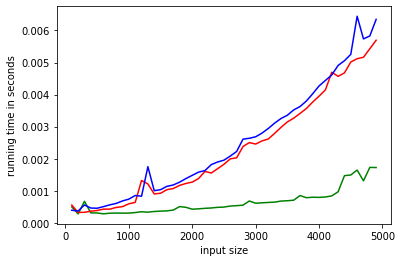

In [76]:
input_arr = [i for i in range(100, 5_000, 100)]

fun3 = automatic_time(input_arr, math.factorial)
plt.plot(input_arr, fun3, color='green')
fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2, color='red')
fun1 = automatic_time(input_arr, factorial)
plt.plot(input_arr, fun1, color='blue')
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

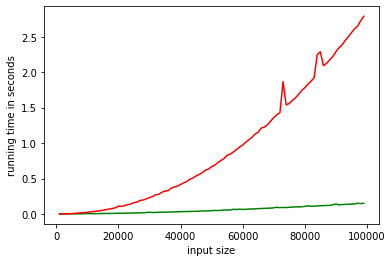

In [77]:
input_arr = [i for i in range(1000, 100_000, 1000)]

fun3 = automatic_time(input_arr, math.factorial)
plt.plot(input_arr, fun3, color='green')
fun2 = automatic_time(input_arr, factorial_loop)
plt.plot(input_arr, fun2, color='red')
# fun1 = automatic_time(input_arr, factorial)
# plt.plot(input_arr, fun1, color='blue')
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

# Exercise: Fibonacci

The sequence, in which each number is the sum of the two preceding numbers is known as the Fibonacci sequence: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, \cdots$ (each number is the sum of the previous two, e.g., $144=55 + 89$).

As you covered Fibonacci in Semester 1, this should be familiar. The twist is we are going to look at a variety of ways of implementing it and the complexity of execution for each.

A direct implementation of the description above would lead to pseudo code like this:

In [40]:
def bad_fibonacci(n):
  """Return the nth Fibonacci number."""
  if n <= 1:
    return n
  else:
    return bad_fibonacci(n-2) + bad_fibonacci(n-1)

In [43]:
bad_fibonacci(1), bad_fibonacci(2),bad_fibonacci(3),bad_fibonacci(4),bad_fibonacci(5),bad_fibonacci(6),bad_fibonacci(7)

(1, 1, 2, 3, 5, 8, 13)

In [44]:
for n in range(10):
    print(n, bad_fibonacci(n))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


In [45]:
# https://en.wikipedia.org/wiki/Golden_ratio
for n in range(2,20):
    print(n, bad_fibonacci(n), bad_fibonacci(n)/bad_fibonacci(n-1))

2 1 1.0
3 2 2.0
4 3 1.5
5 5 1.6666666666666667
6 8 1.6
7 13 1.625
8 21 1.6153846153846154
9 34 1.619047619047619
10 55 1.6176470588235294
11 89 1.6181818181818182
12 144 1.6179775280898876
13 233 1.6180555555555556
14 377 1.6180257510729614
15 610 1.6180371352785146
16 987 1.618032786885246
17 1597 1.618034447821682
18 2584 1.6180338134001253
19 4181 1.618034055727554


## Fibonacci spiral

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Fibonacci_Spiral.svg/500px-Fibonacci_Spiral.svg.png" width="400">

In [46]:
%%timeit
bad_fibonacci(10)

19 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [83]:
%%timeit
bad_fibonacci(12)

10000 loops, best of 5: 72.5 µs per loop


In [84]:
%%timeit
bad_fibonacci(16)

1000 loops, best of 5: 494 µs per loop


In [47]:
%%timeit
bad_fibonacci(20)

2.12 ms ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%%timeit
bad_fibonacci(24)

16.3 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%%timeit
bad_fibonacci(32)

702 ms ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


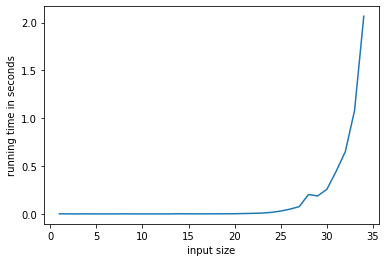

In [50]:
input_arr = [i for i in range(1, 35, 1)]

fun2 = automatic_time(input_arr, bad_fibonacci)
plt.plot(input_arr, fun2, label = "Bad Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [ ]:
# so bad_fibonacci looks like an exponational complexity

In [ ]:
arr = [2**n for n in range(30)]
plt.plot(list(range(30)), arr)
plt.show()

In [ ]:
# sure smells like exponential

In [ ]:
# what is so bad about bad fibonacci ?
# so for each recursive call you get new 2 recursive calls
# it is like that story of inventor of chess in India
# he asked for 1 grain of rice on first square
# 2 on 2nd , 4 on 3rd, 8 on 4th,
# the story modification is that king realized the problem
# to get out of it king said ok, you have to count the rice 


In [90]:
2**32 # he could count half a board

4294967296

In [91]:
2**64 # not likely for a human...

18446744073709551616

In [51]:


def good_fibonacci(n):
  """Return pair of Fibonacci numbers, F(n) and F(n-1)."""
  if n <= 1:
    return (n,0)
  else:
    (a, b) = good_fibonacci(n-1) # looks linear here
    return (a+b, a)

In [52]:
good_fibonacci(10)

(55, 34)

In [53]:
good_fibonacci(100)

(354224848179261915075, 218922995834555169026)

In [95]:
%%timeit
good_fibonacci(10)

100000 loops, best of 5: 1.97 µs per loop


In [96]:
%%timeit
good_fibonacci(20)

100000 loops, best of 5: 4.14 µs per loop


In [54]:
%%timeit
good_fibonacci(30)

4.8 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


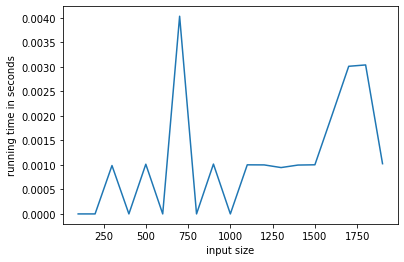

In [61]:
input_arr = [i for i in range(100, 2_000, 100)]

fun2 = automatic_time(input_arr, good_fibonacci)
plt.plot(input_arr, fun2, label="Good Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [98]:
import sys
print(sys.getrecursionlimit())

6000


In [ ]:
#https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it
sys.setrecursionlimit(100_000)
print(sys.getrecursionlimit())

In [ ]:
good_fibonacci(5_000)

In [ ]:
## Fibonacci Solutions

1. timing

In [62]:
def fibonacci_loop(n):
    a, b = 1, 1
    cnt = 3
    while cnt <= n:
        a, b = a+b, a  # Python lets us swap values using tuple unpacking
        # in other languages we would need a temporary variable
        cnt += 1
    return a

In [102]:
fibonacci_loop(2)

1

In [104]:
fibonacci_loop(10), good_fibonacci(10), bad_fibonacci(10)

(55, (55, 34), 55)

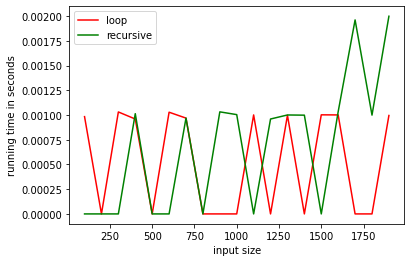

In [66]:
input_arr = [i for i in range(100, 2_000, 100)]

fun2 = automatic_time(input_arr, fibonacci_loop)
plt.plot(input_arr, fun2, color='red')
fun1 = automatic_time(input_arr, good_fibonacci)
plt.plot(input_arr, fun1, color='green')
# add legend
plt.legend(["loop","recursive"])
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

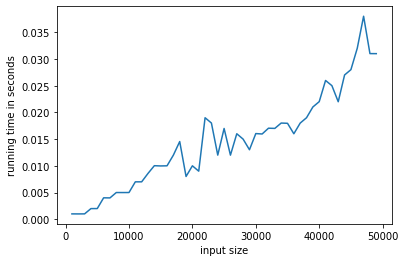

In [73]:
input_arr = [i for i in range(1000, 50_000, 1000)]

fun2 = automatic_time(input_arr, fibonacci_loop)
plt.plot(input_arr, fun2, label="Loop Fibonacci")
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [109]:
fibonacci_loop(50_000)

1077773489307297478027903885511948082962510676941157978490230921003274473536465230498488444020476029849319433283274054953307539817330483067414835387175554540519844620087346424938072325821301670190811988251618614959586085409937375106530448744637829968513893256636681633131732045918931898863135599612655615546389764030557151405397922601243227304829000716908863786206755177008322693280878498662740588365375937582745087047441929768088349613112971288592851767548484151032523851465334921528252459084466698411101587182887301894506311341515623798245893600417568995720126596157628990959355731402138029685765390557089535847112683962321195360189733388114238140515264593740927152326504059583750815213732368481593236728447575119467557464554422126542220275696283937536759059155955463878564256896667116761467384803801434909803321471265525245144152549832048734930166056768820668771759919744444935935088639508014800544331468556549936334994139143072089673319542213769664519855004306020366507003052291723041808934238051

In [110]:
# 2. It is not tail recursive becuase there is something to do after returning the values (adding them together). We can use 2 accumulators to avoid this.

# Example: Binary Search

Binary search is a classic recursive algorithm to find a target value within a sorted sequence. This is among the most important of computer algorithms, and it is the reason that we so often store data in sorted order.

e.g. For the sorted sequence below stored in a Python list with indexes above:

<table>
<tr><th>0</th><th>1</th><th> 2</th><th>3</th><th>4</th><th> 5</th><th>6</th><th>7</th><th> 8</th><th>9</th><th>10</th><th> 11</th> </tr>
<tr><td>2</td><td>4</td><td> 5</td><td>6</td><td>8</td><td> 9</td><td>15</td><td>16</td><td> 17</td><td>22</td><td>30</td><td> 31</td> </tr>
</table>

If the sequence was unsorted a simple solution is a _sequential search algorithm_: use a loop to examine every element. You either reach the end of the list or find the target.

It is linear complexity, running in $\mathcal{O}(n)$ time as worst case it inspects every element in the sequence.

A sorted sequence allows a much faster approach. Think about how you would accomplish this task by hand: divide in two, and choose the middle digit as a candidate to compare to the target. Everything to the left of the candidate is lower than it and everything to the right is higher. Compare the target to the candidate and discard the left if the candidate is lower and the right if it is higher. Then repeat your _binary search_ algorithm. This is much more efficient, running in $\mathcal{O}($log$n$) time.

Review the iterative and recursive binary search algorithm implementations below.

In [111]:
def binary_search_iterative(data, target):
    """Return True if target is found in the given Python list."""
    low = 0
    high = len(data)-1
    while low <= high: # so while array/list pointers do not meet we keep going
        mid = (low + high) // 2 # // meaning even half
        if target == data[mid]:         # found a match
            return True
        elif target < data[mid]:
            high = mid - 1                # only consider values left of mid
        else:
            low = mid + 1                 # only consider values right of mid
    return False                      # loop ended without success

In [112]:
def binary_search(data, target, low, high):
    """Return True if target is found in indicated portion of a Python list.

      The search only considers the portion from data[low] to data[high] inclusive.
      """
    if low > high:
        return False                    # interval is empty; no match
    else:
        mid = (low + high) // 2
    if target == data[mid]:         # found a match
        return True
    elif target < data[mid]:
        # recur on the portion left of the middle
        return binary_search(data, target, low, mid - 1)
    else: # target > data[mid]
        # recur on the portion right of the middle
        return binary_search(data, target, mid + 1, high)

When a function makes two recursive calls, we say that it uses binary recursion. Clearly the binary_search above is a binary recursion. Drawing the English ruler and the bad fibonacci function are also examples of binary recursion.

In [114]:
data=[2,4,5,6,8,9,15,16,17,22,30,31,100, 9000, 9001,10_000]
iter_ans = binary_search_iterative(data,100)
iter_ans

True

In [115]:
binary_search_iterative(data,15)

True

In [ ]:
binary_search_iterative(data,7)

In [116]:
%%timeit
binary_search_iterative(list(range(1_000_000)), 9000)

10 loops, best of 5: 38.1 ms per loop


In [117]:
# better would be to make the list before timing so as not to distort timing for the algorithm itself
million = list(range(1_000_000))
million[-5:]

[999995, 999996, 999997, 999998, 999999]

In [118]:
%%timeit
binary_search_iterative(million, 9000)

The slowest run took 4.78 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.33 µs per loop


## Time the right thing - exclude data preparation if possible

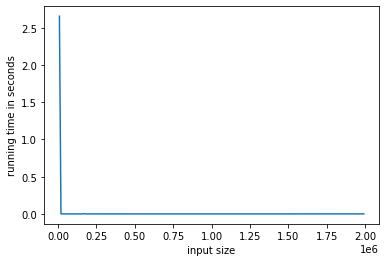

In [121]:
input_arr = [(list(range(i)), 9000) for i in range(10_000, 2_000_000, 10_000)]

fun1 = automatic_time(input_arr, binary_search_iterative)
plt.plot([len(el[0]) for el in input_arr], fun1)b
# fun2 = automatic_time(input_arr, binary_search) # the recursive one
# plt.plot([len(el[0]) for el in input_arr], fun2)
plt.xlabel("input size")
plt.ylabel("running time in seconds")
plt.show()

In [122]:
input_arr = None # let GC handle this

In [ ]:
# so binary search is in log n time we would need a trulyl large data sets to see difference
# most of our time is spent linearly setting up our data sets

In [123]:
arr = list(range(1_000_000))
big_arr = list(range(100_000_000))

In [124]:
%%timeit
binary_search(arr, 9000, 0, len(arr)-1)

The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.6 µs per loop


In [125]:
%%timeit
binary_search_iterative(arr, 9000)

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.39 µs per loop


In [126]:
%%timeit
binary_search(big_arr, 9000, 0, len(big_arr)-1)

100000 loops, best of 5: 10.1 µs per loop


In [127]:
%%timeit
binary_search(big_arr, 50_000_000, 0, len(big_arr)-1) # so this should hit with 1 comparison

The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.82 µs per loop


In [128]:
%%timeit
binary_search_iterative(big_arr, 9000)

The slowest run took 5.42 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.57 µs per loop


In [129]:
%%timeit
binary_search_iterative(big_arr, 50_000_000) # so this should hit with 1 comparison

100000 loops, best of 5: 7.17 µs per loop


In [ ]:
# so creating a recursive algorithm yourself
# check if problem is already solved
# otherwise reduce problem to simpler instance of the same problem
# in other words Simplify and Delegate the problem

In [ ]:
# all recursive algorithms can be transformed to regular loop based algorithms
# worst case you build your stack for holding the function calls

## Length of an array

In [ ]:
# in case we forgout about len() function ...

In [ ]:
def array_len(x):
    if x == []:
        return 0
    else:
        return 1 + array_len(x[1:])

In [ ]:
array_len([])

0

In [ ]:
array_len([1, 2, 3])

3

In [ ]:
array_len(list(range(2961))) # so it looks like 3000 limit is actually 2961 (presumably stack needs space for other functions)

2961

## Sum of the elements in an array

In [ ]:
# in case we forgot about sum() function ...

In [ ]:
def array_sum(x):
    if x == []:
        return 0
    else:
        return x[0] + array_sum(x[1:])

In [ ]:
array_sum([])

0

In [ ]:
array_sum([5])

5

In [ ]:
array_sum([1, 2, 3, 4, 5])

15

In [ ]:
array_sum(list(range(101))) # remember the formula for summing arithmethic series n(n-1)/2

5050

In [ ]:
array_sum(list(range(2961)))

4382280

# Tower of Hanoi
![tower](https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Tower_of_Hanoi.jpeg/600px-Tower_of_Hanoi.jpeg)

* must not move more than one disc at a time 
* must place this disc on a needle so that there is no smaller disc below it

## Quicksort - more about sorting later on

In [ ]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        smaller, bigger = [], []
        for ele in array[1:]:
            if ele <= pivot:
                smaller.append(ele)
            else:
                bigger.append(ele)
        return quicksort(smaller) + [pivot] + quicksort(bigger)

In [ ]:
quicksort([])

In [ ]:
quicksort([5])

In [ ]:
quicksort([5, 4])

In [ ]:
quicksort([1, 2, 7, 5, 4])

In [ ]:
quicksort([5, 4, 3, 2])